In [20]:
from keras.models import Sequential
from keras.layers import SimpleRNN
from keras.layers import Dense
from keras.layers import Embedding, SpatialDropout1D

In [21]:
import pandas as pd
import numpy as np
data_input = pd.ExcelFile('data training vector.xlsx').parse(0)
X_data = data_input.X.to_numpy()
y_train = data_input.y.to_numpy()
X = []
for i in range(0,len(X_data)):
    X.append(np.fromstring(X_data[i],sep=' '))
X_train = np.asarray(X)
X_train.shape

(24748, 12)

In [22]:
import pandas as pd
import numpy as np
data_input = pd.ExcelFile('data testing vector.xlsx').parse(0)
X_data = data_input.X.to_numpy()
y_test = data_input.y.to_numpy()
X = []
for i in range(0,len(X_data)):
    X.append(np.fromstring(X_data[i],sep=' '))
X_test = np.asarray(X)
X_test.shape

(6188, 12)

In [23]:
 model = Sequential([
    
    Embedding(input_dim=180, output_dim=16, input_length=12), # embedding

    SimpleRNN(128), # rnn

    Dense(15,activation='softmax')  # dense
    ])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 12, 16)            2880      
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 128)               18560     
_________________________________________________________________
dense_2 (Dense)              (None, 15)                1935      
Total params: 23,375
Trainable params: 23,375
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train,epochs=50, batch_size=256, verbose=2)
scores = model.evaluate(X_test, y_test)

Epoch 1/50
97/97 - 2s - loss: 1.3179 - accuracy: 0.5712
Epoch 2/50
97/97 - 1s - loss: 0.5509 - accuracy: 0.8049
Epoch 3/50
97/97 - 1s - loss: 0.4192 - accuracy: 0.8503
Epoch 4/50
97/97 - 1s - loss: 0.3492 - accuracy: 0.8750
Epoch 5/50
97/97 - 1s - loss: 0.2945 - accuracy: 0.8962
Epoch 6/50
97/97 - 1s - loss: 0.2658 - accuracy: 0.9057
Epoch 7/50
97/97 - 1s - loss: 0.2386 - accuracy: 0.9162
Epoch 8/50
97/97 - 1s - loss: 0.2020 - accuracy: 0.9315
Epoch 9/50
97/97 - 1s - loss: 0.1778 - accuracy: 0.9388
Epoch 10/50
97/97 - 1s - loss: 0.1562 - accuracy: 0.9484
Epoch 11/50
97/97 - 1s - loss: 0.1312 - accuracy: 0.9587
Epoch 12/50
97/97 - 1s - loss: 0.1158 - accuracy: 0.9631
Epoch 13/50
97/97 - 1s - loss: 0.1025 - accuracy: 0.9681
Epoch 14/50
97/97 - 1s - loss: 0.0894 - accuracy: 0.9732
Epoch 15/50
97/97 - 1s - loss: 0.0751 - accuracy: 0.9792
Epoch 16/50
97/97 - 1s - loss: 0.0687 - accuracy: 0.9804
Epoch 17/50
97/97 - 1s - loss: 0.0570 - accuracy: 0.9839
Epoch 18/50
97/97 - 1s - loss: 0.0540 - 

In [25]:
print("Accuracy: %.2f%%" % (scores[1]*100))
# Menampilkan grafik accuracy dan validation accuracy

Accuracy: 99.37%


In [26]:
wazan = ['Iii',
 '(VII) tsulatsy',
 '(IV) tsulatsy',
 '(III) tsulatsy',
 '(X) tsulatsy',
 'Iuu',
 '(VI) tsulatsy',
 '(V) tsulatsy',
 '(IX) tsulatsy',
 'Iaa',
 'Iai',
 'Iia',
 "(I) ruba'iy",
 '(II) tsulatsy',
 'Iau']
predicted_word = {}
for w in wazan:
    predicted_word[w] = {'index':[],'count':0}
predicted_word

{'Iii': {'index': [], 'count': 0},
 '(VII) tsulatsy': {'index': [], 'count': 0},
 '(IV) tsulatsy': {'index': [], 'count': 0},
 '(III) tsulatsy': {'index': [], 'count': 0},
 '(X) tsulatsy': {'index': [], 'count': 0},
 'Iuu': {'index': [], 'count': 0},
 '(VI) tsulatsy': {'index': [], 'count': 0},
 '(V) tsulatsy': {'index': [], 'count': 0},
 '(IX) tsulatsy': {'index': [], 'count': 0},
 'Iaa': {'index': [], 'count': 0},
 'Iai': {'index': [], 'count': 0},
 'Iia': {'index': [], 'count': 0},
 "(I) ruba'iy": {'index': [], 'count': 0},
 '(II) tsulatsy': {'index': [], 'count': 0},
 'Iau': {'index': [], 'count': 0}}

In [27]:
yhatS = []
for i in range(0,len(X_test)):
    yhat = model.predict(np.expand_dims(X_test[i],0))
    yhat = np.argsort(yhat[0])[-1]
    if (yhat == y_test[i]):
        predicted_word[wazan[yhat]]['index'].append(i)
        predicted_word[wazan[yhat]]['count']+=1
    yhatS.append(yhat)

In [28]:
for key , value in predicted_word.items():
    print(key,' : ',value['count'])

Iii  :  19
(VII) tsulatsy  :  56
(IV) tsulatsy  :  1183
(III) tsulatsy  :  138
(X) tsulatsy  :  237
Iuu  :  87
(VI) tsulatsy  :  35
(V) tsulatsy  :  376
(IX) tsulatsy  :  54
Iaa  :  591
Iai  :  763
Iia  :  738
(I) ruba'iy  :  38
(II) tsulatsy  :  737
Iau  :  1097


In [29]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print(accuracy_score(y_test,yhatS))

0.9936974789915967


In [30]:
precision_score(y_test,yhatS,average='macro')

0.9933282425064243

In [31]:
recall_score(y_test,yhatS,average='macro')

0.9688547756790279

In [32]:
f1_score(y_test,yhatS,average='macro')

0.9796179474583673

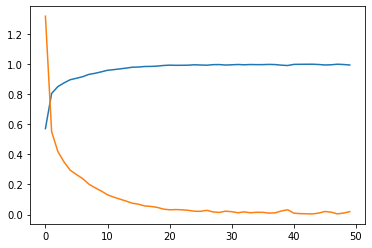

In [33]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])

# Tampilkan grafik yang telah diplot
plt.show()

In [34]:
model.save("model.h5")